# Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers 
to personal loan customers (while retaining them asdepositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department
to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [135]:
##Import necessary packages in Python ie., numpy,pandas,matplotlib,seaborn,sklearn
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# 1. Read the column description and ensure you understand each attribute well

1. ID- Customer ID
2. Age- Customer's age in completed years.
3. Experience- No. of years of professional experience.
4. Income- Annual income of the customer.
5. ZIP Code- Home Address ZIP code.
6. Family- Family size of the customer.
7. CCAvg- Avg. spending on credit cards per month
8. Education- 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
9. Mortgage- Value of house mortgage if any.
10. Personal Loan- Did this customer accept the personal loan offered in the last campaign? (Target column)
11. Securities Account- Does the customer have a securities account with the bank?
12. CD Account- Does the customer have a certificate of deposit (CD) account with the bank?
13. Online- Does the customer use internet banking facilities?
14. Credit card- Does the customer use a credit card issued by UniversalBank?

# Note: 
I did opened bank modelling data set in excel format, applied filters on all columns and saw the values and ranges

In [136]:
##Loading Thera bank Personal Loan dataset
##Checking the column information and sample records
therabank_df=pd.read_csv('C:/Users/Surya-Rekha/Downloads/Bank_Personal_Loan_Modelling.csv')
therabank_df.info()
therabank_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [137]:
##Let's analyze skewness for mortgage column
therabank_df['Mortgage'].value_counts(normalize=True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
91     0.0032
89     0.0032
90     0.0030
102    0.0030
78     0.0030
118    0.0028
101    0.0028
87     0.0028
94     0.0028
131    0.0028
104    0.0028
109    0.0026
106    0.0026
116    0.0026
144    0.0026
112    0.0026
81     0.0026
185    0.0024
76     0.0024
120    0.0024
97     0.0024
121    0.0024
100    0.0024
158    0.0022
184    0.0022
        ...  
345    0.0002
337    0.0002
321    0.0002
281    0.0002
273    0.0002
265    0.0002
253    0.0002
237    0.0002
433    0.0002
477    0.0002
298    0.0002
481    0.0002
290    0.0002
286    0.0002
278    0.0002
258    0.0002
210    0.0002
206    0.0002
617    0.0002
601    0.0002
589    0.0002
581    0.0002
587    0.0002
569    0.0002
553    0.0002
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [138]:
##Mortgage column has high skewness based on above output, hence dropping the column, Mortgage
therabank_df.drop('Mortgage',axis=1,inplace=True)
therabank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,1,0,0,0,0


In [139]:
## In generally professional experience should be greater than 0, but should not be less than 0. Hence dropping the records with Experience={-1, -2, -3} which are invalid

therabank_df.drop(therabank_df[therabank_df['Experience'] < 0].index, inplace=True)
therabank_df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,1,0,0,0,0


# 2. Study the data distribution in each attribute, share your findings

In [140]:
## Every column's missing value will replace with median values respectively
therabank_df=therabank_df.replace('?',np.nan)
therabank_df=therabank_df.apply(lambda x: x.fillna(therabank_df.median()),axis=0)
                                
## Let's analyze distribution of various attributes
therabank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0
Securities Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.00,1.0


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


1. Age and experience are linearly correlated ie., when age increases experience increases and vice-versa


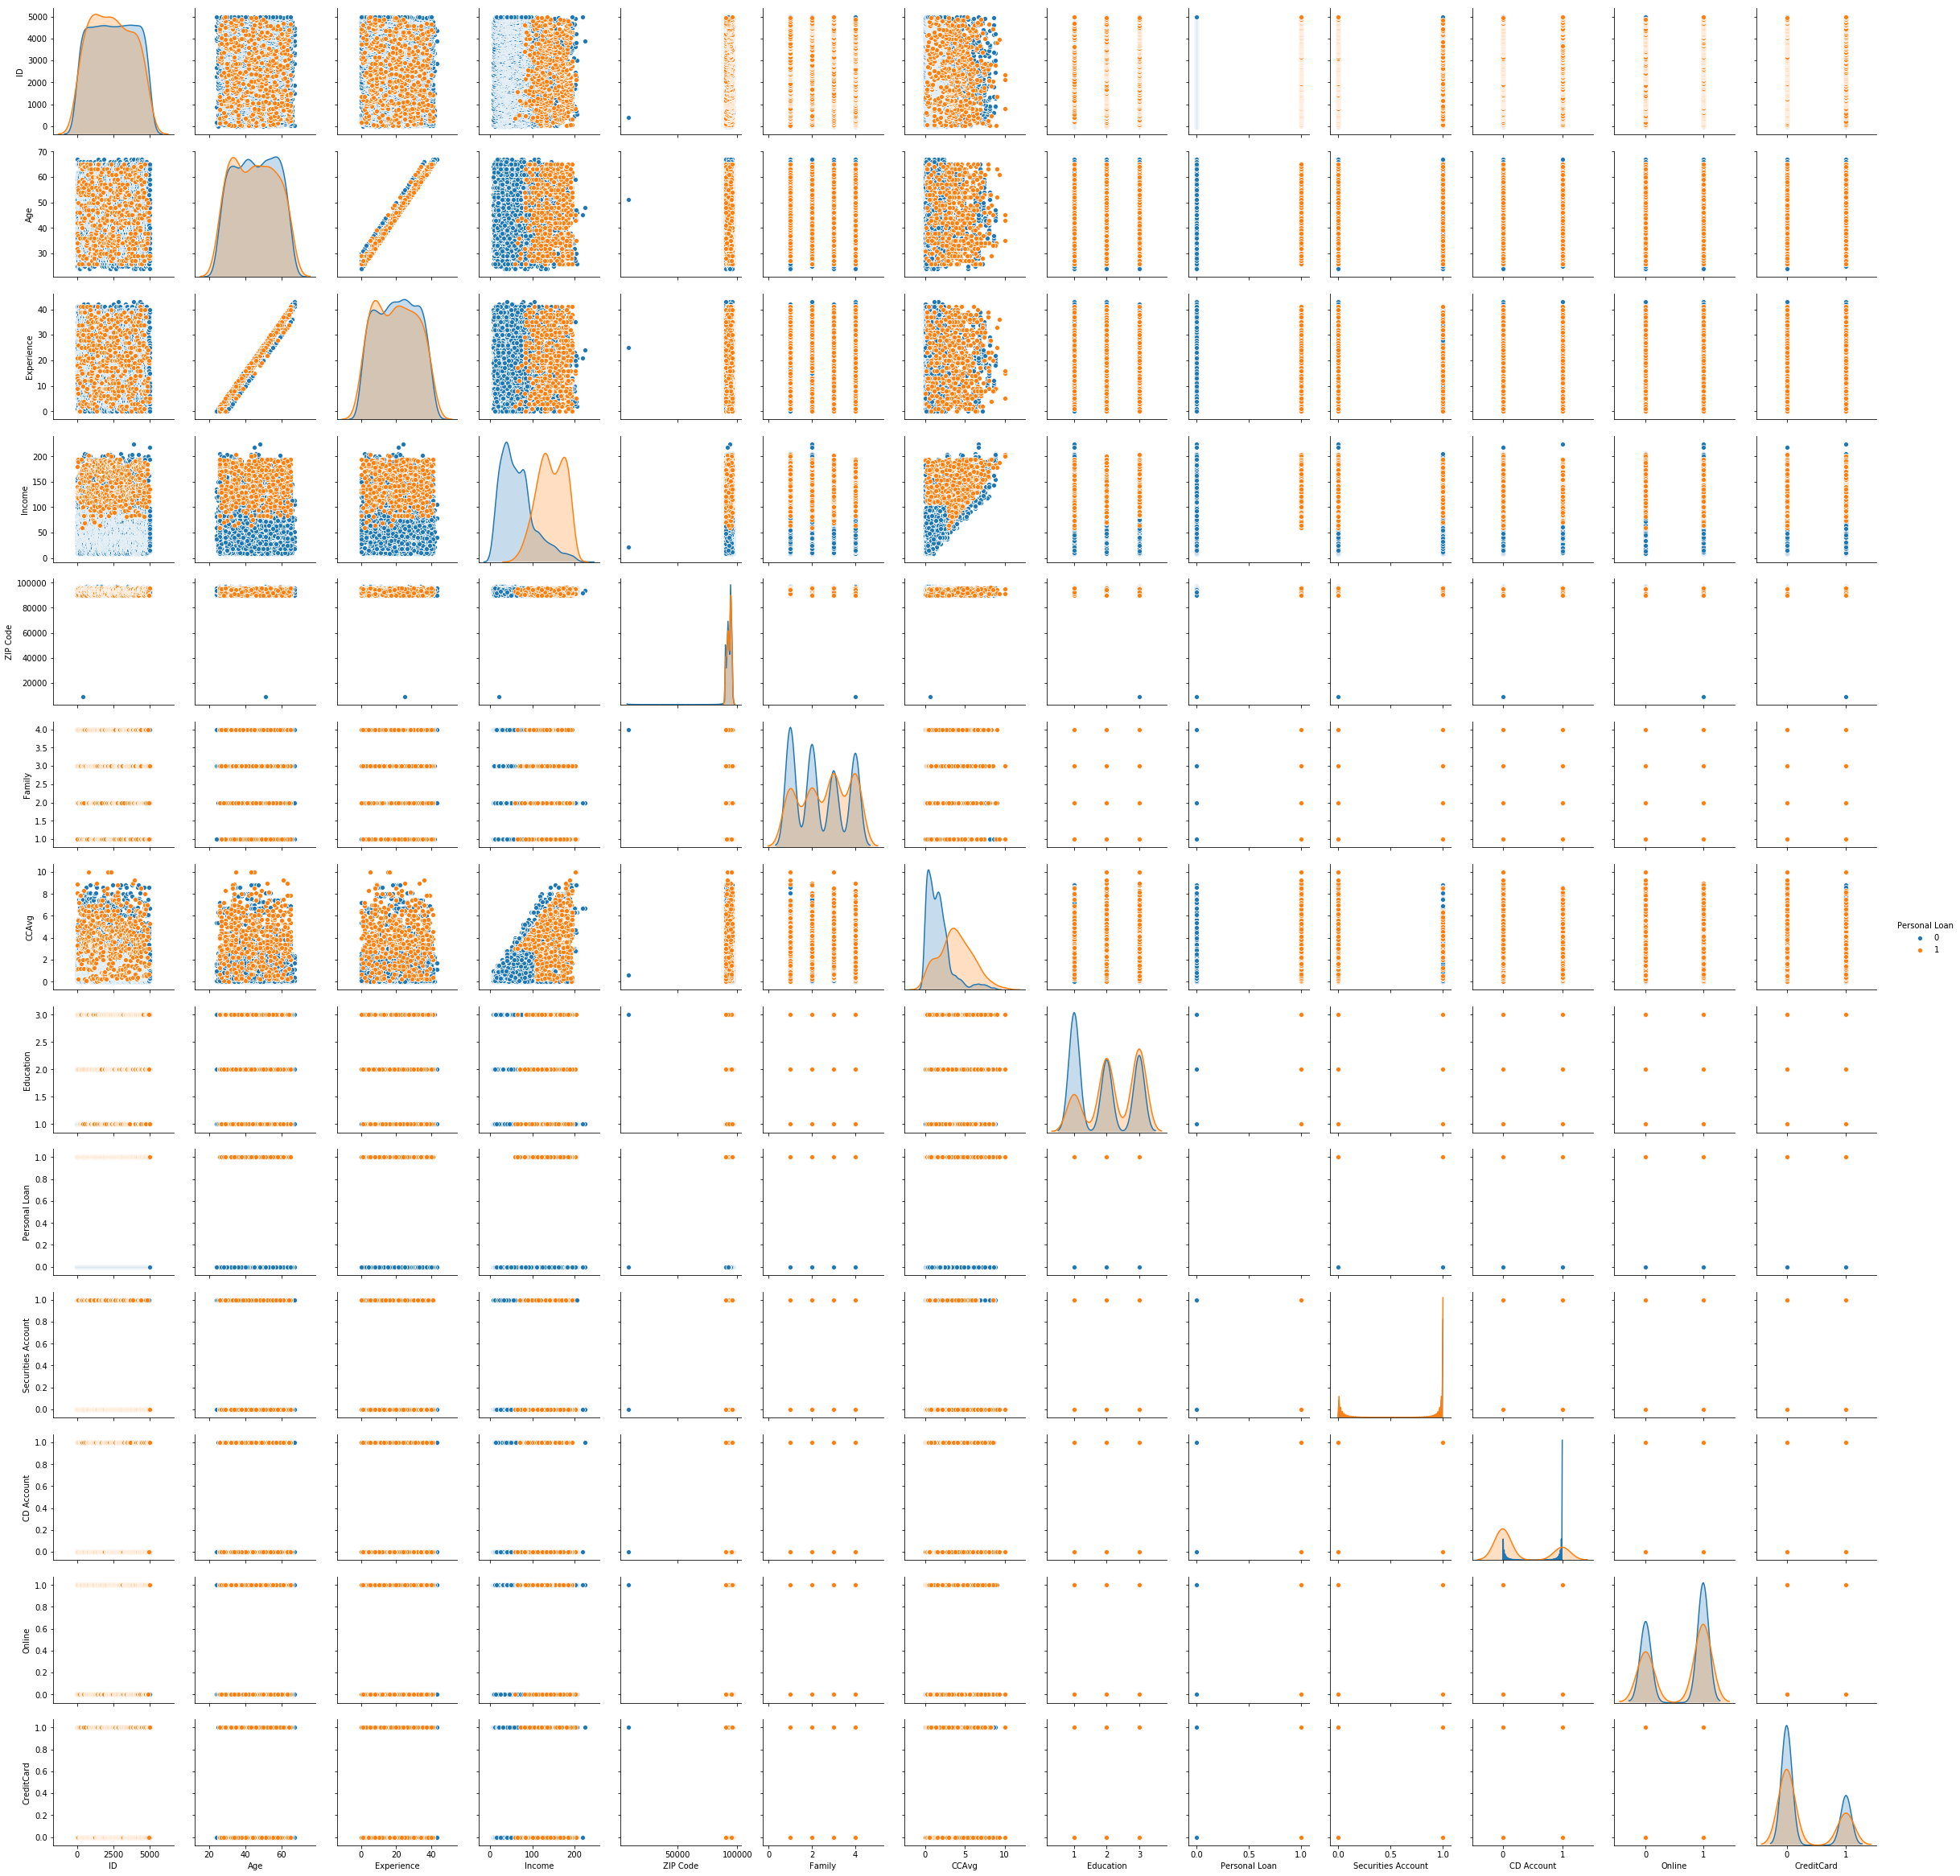

In [141]:
## Using pairplot to analyze the distribution of various attributes
sns.pairplot(therabank_df, diag_kind='kde',hue='Personal Loan')
print('1. Age and experience are linearly correlated ie., when age increases experience increases and vice-versa')

2. For Personal Loan vs Income distribution, some people with salary in between 0 to 155 are classified as non buyers(0) and some people with salary in between 60 to 210 are classifed as buyers(1)


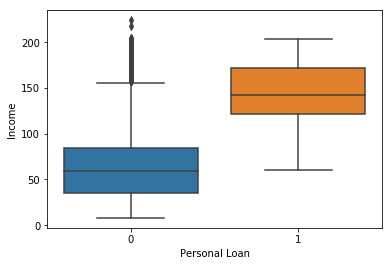

In [142]:
sns.boxplot(therabank_df['Personal Loan'],therabank_df['Income'],orient="v")
print('2. For Personal Loan vs Income distribution, some people with salary in between 0 to 155 are classified as non buyers(0) and some people with salary in between 60 to 210 are classifed as buyers(1)')

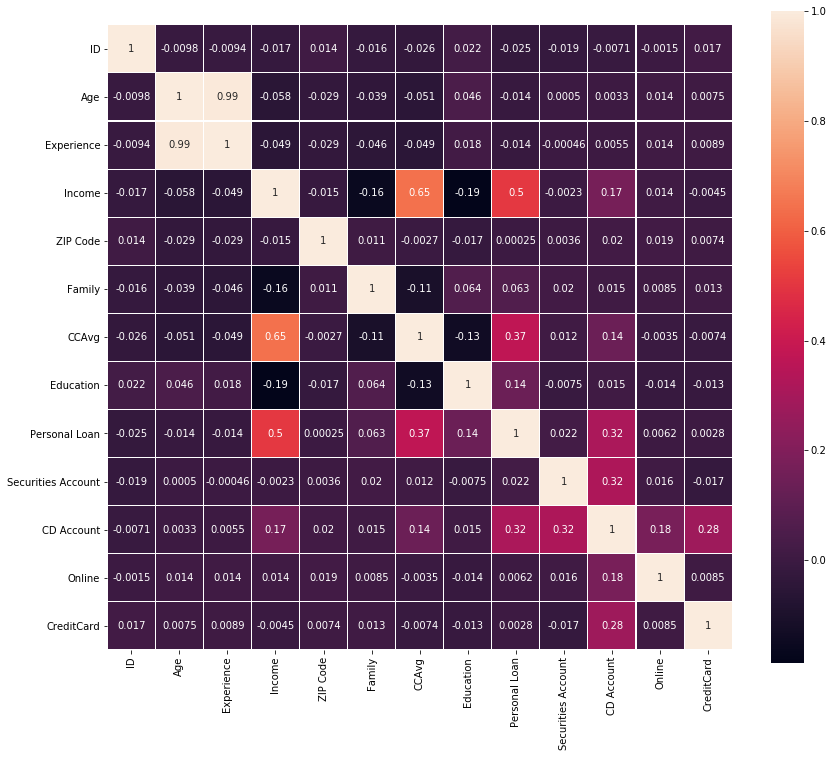

In [143]:
# Correlation
plt.figure(figsize=(14,12))
sns.heatmap(therabank_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

# 3. Get the target column distribution. Your comments

In [144]:
##Let's look at target/predicted column 'Personal Loan' to understand the distribution
therabank_df.groupby('Personal Loan').mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,2513.152641,45.609893,20.383393,66.194270,93151.398389,2.367726,1.724349,1.840868,0.102059,0.036258,0.596016,0.293644
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,0.125000,0.291667,0.606250,0.297917


In [145]:
##Converting X and y variables to relevant categorical variables
therabank_df['Personal Loan']= therabank_df['Personal Loan'].astype('category')
therabank_df['Securities Account']= therabank_df['Securities Account'].astype('category')
therabank_df['CD Account']= therabank_df['CD Account'].astype('category')
therabank_df['Online']= therabank_df['Online'].astype('category')
therabank_df['CreditCard']= therabank_df['CreditCard'].astype('category')

therabank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
ID                    4948 non-null int64
Age                   4948 non-null int64
Experience            4948 non-null int64
Income                4948 non-null int64
ZIP Code              4948 non-null int64
Family                4948 non-null int64
CCAvg                 4948 non-null float64
Education             4948 non-null int64
Personal Loan         4948 non-null category
Securities Account    4948 non-null category
CD Account            4948 non-null category
Online                4948 non-null category
CreditCard            4948 non-null category
dtypes: category(5), float64(1), int64(7)
memory usage: 532.5 KB


0    0.902991
1    0.097009
Name: Personal Loan, dtype: float64


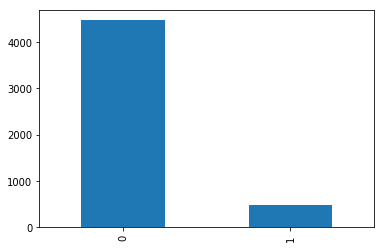

In [146]:
##Calculate base-line proportion ratio of Y/N to identify data imbalance
prop_y= therabank_df['Personal Loan'].value_counts(normalize=True)
print(prop_y)

therabank_df.groupby(["Personal Loan"]).count()
pd.value_counts(therabank_df["Personal Loan"]).plot(kind='bar')

In [147]:
# Most of them are non defaulter's to avail personal loan
# The model's ability to predict class 0 is better than predicting class 1

# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [148]:
##Define X and y variables
X = therabank_df.drop('Personal Loan', axis=1)
y = therabank_df[['Personal Loan']]
## Convert catgeorical variables to dummy variables
X= pd.get_dummies(X, drop_first=True)

In [149]:
## Splitting data set to training, test sets in ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

# Logistic Regression model

In [150]:
from sklearn.linear_model import LogisticRegression
# Define Logistic regression model
logregmodel = LogisticRegression()
print(logregmodel)
print('\n')
#Fitting model
logregmodel.fit(X_train, y_train)
#Predicting y values
y_pred_log=logregmodel.predict(X_test)

t=list(X_train.columns)
coef_df = pd.DataFrame(logregmodel.coef_, columns=t)
coef_df['Intercept'] = logregmodel.intercept_
print(coef_df)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


         ID       Age  Experience   Income  ZIP Code    Family     CCAvg  \
0 -0.000053  0.009179    0.006504  0.03652  -0.00007  0.012931  0.004887   

   Education  Securities Account_1  CD Account_1  Online_1  CreditCard_1  \
0    0.01409              0.001104      0.004181 -0.000639     -0.000407   

   Intercept  
0  -0.000062  


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [151]:
# Check the accuracy on training set
print(logregmodel.score(X_train, y_train))
print(logregmodel.score(X_test, y_test))

0.9084608720762345
0.9030303030303031


# K-NN model

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [153]:
# Define KNN model
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='distance')
print(knnmodel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')


In [154]:
# Fit the model
knnmodel.fit(X_train,y_train)

#Calculate accuracy of training set
print(knnmodel.score(X_train, y_train))
print(knnmodel.score(X_test, y_test))

# Predict y values
y_pred_near = knnmodel.predict(X_test)

1.0
0.9003367003367003


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Naive Bayes model

In [155]:
from sklearn.naive_bayes import GaussianNB


In [156]:
gnbmodel = GaussianNB()
# Fit the model
gnbmodel.fit(X_train, y_train)

# Calculate accuracy of training set
print(gnbmodel.score(X_train, y_train))
print(gnbmodel.score(X_test, y_test))

# Predict y values
y_pred_naive = knnmodel.predict(X_test)

0.8896910193473867
0.8835016835016835


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 6. Print the confusion matrix for all the above models

In [157]:
print('1. Confusion matrix for Logistic Regression model: \n', confusion_matrix(y_test, y_pred_log))
print('\n')
print('2. Confusion matrix for KNN model: \n', confusion_matrix(y_test, y_pred_near))
print('\n')
print('3. Confusion matrix for Naive Bayes model: \n', confusion_matrix(y_test, y_pred_naive))

1. Confusion matrix for Logistic Regression model: 
 [[1294   42]
 [ 102   47]]


2. Confusion matrix for KNN model: 
 [[1323   13]
 [ 135   14]]


3. Confusion matrix for Naive Bayes model: 
 [[1323   13]
 [ 135   14]]


# 7. Give your reasoning on which is the best model in this case and why it performs better?

In [158]:
# Let's see all metrics like accuracy, precision, recall of all models

In [159]:
print('1. Classification report for Logistic Regression model: \n', classification_report(y_test, y_pred_log))
print('\n')
print('2. Classification report for KNN model: \n', classification_report(y_test, y_pred_near))
print('\n')
print('3. Classification report for Naive Bayes model: \n', classification_report(y_test, y_pred_naive))

1. Classification report for Logistic Regression model: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1336
           1       0.53      0.32      0.39       149

   micro avg       0.90      0.90      0.90      1485
   macro avg       0.73      0.64      0.67      1485
weighted avg       0.89      0.90      0.89      1485



2. Classification report for KNN model: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1336
           1       0.52      0.09      0.16       149

   micro avg       0.90      0.90      0.90      1485
   macro avg       0.71      0.54      0.55      1485
weighted avg       0.87      0.90      0.87      1485



3. Classification report for Naive Bayes model: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1336
           1       0.52      0.09      0.16       149

   micro avg       0.90     

In [160]:
print('1. Accuracy score for Logistic Regression model: \n', accuracy_score(y_test, y_pred_log)*100)
print('\n')
print('2. Accuracy score for KNN model: \n', accuracy_score(y_test, y_pred_near)*100)
print('\n')
print('3. Accuracy score for Naive Bayes model: \n', accuracy_score(y_test, y_pred_naive)*100)

1. Accuracy score for Logistic Regression model: 
 90.30303030303031


2. Accuracy score for KNN model: 
 90.03367003367003


3. Accuracy score for Naive Bayes model: 
 90.03367003367003


In [161]:
# Accuracy of models is almost same, but not quite sufficient to decide best model.

# Let's compare the models based on mean, standard deviation and recall across the distribution of data, 
# and then see which model performs better in these terms.


# Algorithm comparision based on Mean, Standard Deviation and Recall

In [162]:
# Prepare models
models = []
models.append(('Logistic_Regression', LogisticRegression()))
models.append(('KNearestNeighbors', KNeighborsClassifier()))
models.append(('NaiveBayes', GaussianNB()))
print(models)

[('Logistic_Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('KNearestNeighbors', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')), ('NaiveBayes', GaussianNB(priors=None, var_smoothing=1e-09))]


In [163]:
# Evaluate each model in turn with 'recall'
results = []
names = []
scoring = 'recall'

In [164]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        crossval_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(crossval_results)
        names.append(name)
        #print(results)
        msg = "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
        print('\n {}'.format(msg))

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Surya-Rekha\Anaconda3\lib


 Logistic_Regression: 0.549580, (0.067249)

 KNearestNeighbors: 0.549580, (0.067249)

 NaiveBayes: 0.549580, (0.067249)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWa

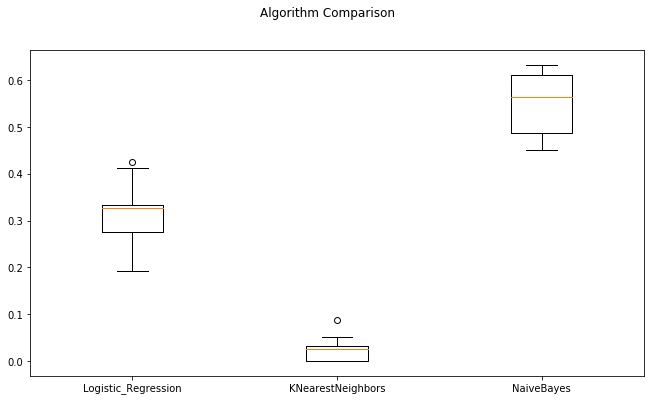

In [165]:
# Boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Reasoning/Conclusion:

From above box plot, in terms of mean, standard deviation and recall "Naive Bayes" model performs well on Thera bank data set.